# Proyecto Final
## Graficar la trayectoria del cometa Halley y los primeros planetas alrededor del Sol

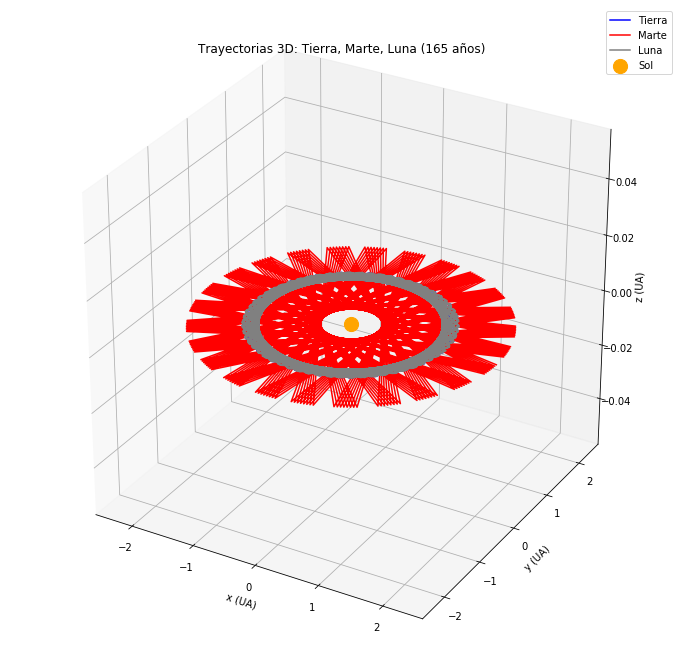

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from scipy.integrate import solve_ivp

# Constantes físicas
G = 6.67430e-11  # Constante gravitacional (m^3 kg^-1 s^-2)
m_sol = 1.989e30  # Masa del Sol (kg)
m_tierra = 5.97e24  # Masa de la Tierra (kg)
m_marte = 6.42e23  # Masa de Marte (kg)
m_luna = 7.35e22  # Masa de la Luna (kg)

# Datos iniciales
cuerpos = {
    "Tierra": {"masa": m_tierra, "distancia": 1.496e11, "velocidad": 29800, "z": 0},
    "Marte": {"masa": m_marte, "distancia": 2.28e11, "velocidad": 24100, "z": 0},
    "Luna": {"masa": m_luna, "distancia": 1.496e11 + 3.84e8, "velocidad": 29800 + 1023, "z": 0},
 #   "Halley": {"masa": 2.2e14, "distancia": 8.76e10, "velocidad": 54600, "z": 0},  # Cometa Halley
}

# Preparar condiciones iniciales
masas = [m_sol] + [c["masa"] for c in cuerpos.values()]
N = len(masas)  # Número de cuerpos

# Posiciones iniciales
posiciones_iniciales = [[0, 0, 0]] + [[c["distancia"], 0, c["z"]] for c in cuerpos.values()]

# Velocidades iniciales
velocidades_iniciales = [[0, 0, 0]] + [[0, c["velocidad"], 0] for c in cuerpos.values()]

# Estado inicial (posiciones y velocidades)
estado_inicial = np.concatenate(
    [np.array(posiciones_iniciales).flatten(), np.array(velocidades_iniciales).flatten()]
    #.flatten() Devuelve una copia del array colapsado a una única dimensión
)

# Función para calcular las aceleraciones
def aceleraciones(t, estado):
    #reshape() me da un nuevo tamaño de array
    posiciones = estado[:N*3].reshape(N, 3)
    velocidades = estado[N*3:].reshape(N, 3)
    aceleraciones = np.zeros_like(posiciones)

    for i in range(N):
        for j in range(N):
            if i != j:
                r_ij = posiciones[i] - posiciones[j]
                distancia = np.linalg.norm(r_ij)
                aceleraciones[i] -= G * masas[j] * r_ij / distancia**3

    dydt = np.concatenate([velocidades.flatten(), aceleraciones.flatten()])
    return dydt

# Ajustes de tiempo
tiempo_total = 60 * 60 * 24 * 365 * 165  # Simulación de 165 años
pasos_tiempo = 20000  # Incremento de pasos para mayor resolución

# Integrar las ecuaciones de movimiento
solucion = solve_ivp(
    aceleraciones, [0, tiempo_total], estado_inicial,
    t_eval=np.linspace(0, tiempo_total, pasos_tiempo), method='RK45', atol=1e-10, rtol=1e-8
)

# Extraer posiciones
posiciones = solucion.y[:N*3].reshape(N, 3, -1)

# Predicción de perihelio y afelio del cometa Halley
#halley_pos = posiciones[-1, :, :]
#distancias_halley = np.linalg.norm(halley_pos, axis=0)
#perihelio = np.min(distancias_halley)
#afelio = np.max(distancias_halley)

# Graficar trayectorias 3D
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

# Reducir puntos para graficar
subset = np.arange(0, posiciones.shape[2], 100)

# Sol
ax.scatter(0, 0, 0, color="orange", s=200, label="Sol")

# Cuerpos
colores = ["blue", "red", "gray", "gold"]
for i, (nombre, color) in enumerate(zip(cuerpos.keys(), colores)):
    ax.plot(posiciones[i+1, 0, subset] / 1e11, posiciones[i+1, 1, subset] / 1e11, posiciones[i+1, 2, subset] / 1e11, label=nombre, color=color)

# Marcar perihelio y afelio del cometa Halley
#ax.scatter(halley_pos[0, np.argmin(distancias_halley)] / 1e11,
 #          halley_pos[1, np.argmin(distancias_halley)] / 1e11,
  #         halley_pos[2, np.argmin(distancias_halley)] / 1e11,
   #        color="gold", s=100, label=f"Perihelio: {perihelio / 1e11:.2f} UA")
#ax.scatter(halley_pos[0, np.argmax(distancias_halley)] / 1e11,
 #          halley_pos[1, np.argmax(distancias_halley)] / 1e11,
  #         halley_pos[2, np.argmax(distancias_halley)] / 1e11,
   #        color="purple", s=100, label=f"Afelio: {afelio / 1e11:.2f} UA")

# Configuración de la gráfica
ax.set_xlabel("x (UA)")
ax.set_ylabel("y (UA)")
ax.set_zlabel("z (UA)")
ax.set_title("Trayectorias 3D: Tierra, Marte, Luna (165 años)")
ax.legend()
plt.show()